<a href="https://colab.research.google.com/github/piyushaanand/Contents/blob/main/daily_total_birth-IN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

<Axes: xlabel='date'>

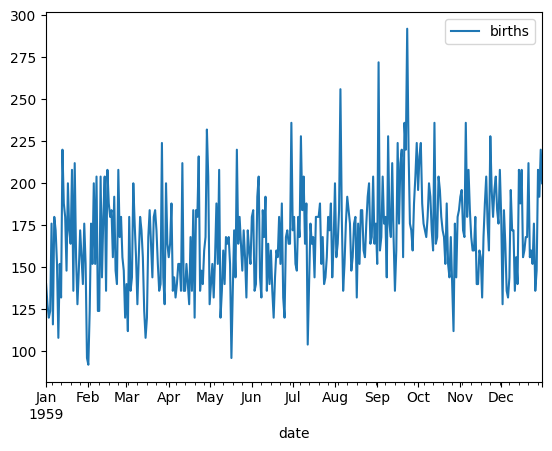

In [5]:
df = pd.read_csv('/content/daily-total-female-births-IN.csv',index_col=0,parse_dates=True)
x = df.values
df.plot()

In [6]:
#Stationary Or Not


In [8]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['births'],autolag='AIC')
print("p-Value :",dftest[1])

p-Value : 5.243412990149959e-05


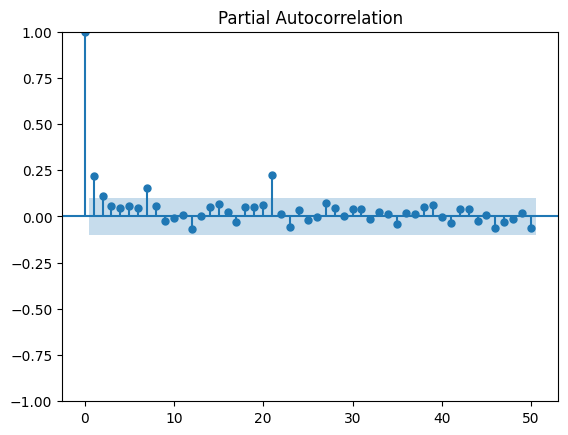

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['births'],lags=50)

In [12]:
train=x[:len(x)-7]
test=x[len(x)-7:]
model=AutoReg(train,lags=30).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  358
Model:                    AutoReg(30)   Log Likelihood               -1538.345
Method:               Conditional MLE   S.D. of innovations             26.341
Date:                Wed, 13 Sep 2023   AIC                           3140.689
Time:                        09:57:10   BIC                           3262.066
Sample:                            30   HQIC                          3189.115
                                  358                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6415     22.517      1.760      0.078      -4.492      83.775
y.L1           0.1444      0.055      2.613      0.009       0.036       0.253
y.L2           0.0714      0.056      1.279      0.2

In [13]:

print(len(train))

358


[167.76909382 157.39980822 158.84538637 166.19028677 172.26644924
 171.46324548 167.97628381]


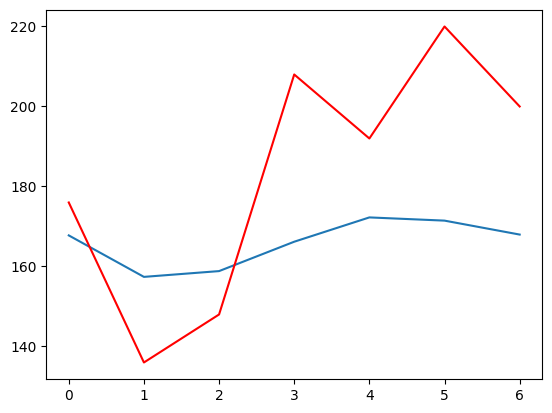

In [15]:
pred=model.predict(start=len(train),end=len(x)-1,dynamic=False)
plt.plot(pred)
plt.plot(test,color="red")
print(pred)


In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

29.669903216701435


In [17]:
pred_future=model.predict(start=len(x)+1,end=len(x)+7,dynamic=False)
print("The prediction for the next weeks")
print(pred_future)
print("Number of Prediction Made : \t",len(pred_future))


The prediction for the next weeks
[153.78620404 156.53279709 174.99933216 179.90620029 178.23602
 165.74234579 163.3321394 ]
Number of Prediction Made : 	 7
